# **PCA Analysis**

Principal Component Analysis (PCA) is a dimensionality reduction technique that is used to reduce the number of variables (features) in a dataset while retaining as much of the important information (variance) as possible. PCA does this by identifying directions, called principal components, along which the variance in the data is maximized.

PCA can be thought of as a way to transform a large set of possibly correlated variables into a smaller set of uncorrelated variables (the principal components). The first principal component captures the most variance in the data, the second captures the second most, and so on.

In simpler terms:

- Dimensionality reduction: PCA reduces the number of features by creating new ones (principal components) that explain most of the variability.

- Data simplification: By transforming data into fewer dimensions, PCA simplifies the data while keeping the most critical information.

### When to Use PCA?
PCA is typically used in scenarios where:

- **The data has many features**: When dealing with high-dimensional data, PCA helps reduce complexity by creating a smaller set of meaningful features.

- **There is multicollinearity**: PCA is useful when features in the dataset are highly correlated. The principal components are uncorrelated, which helps in creating a better predictive model.

- **You need visualization of high-dimensional data**: PCA is commonly used for visualizing data in 2D or 3D, even if the original data has more dimensions.

- **To avoid overfitting**: By reducing the number of dimensions, PCA helps prevent overfitting in machine learning models.

- **Preprocessing**: Often used as a data preprocessing step before applying machine learning models like clustering (e.g., K-means), classification (e.g., logistic regression), or regression models.

PCA is used in applications like:

- **Image compression**: Reducing the number of pixels (features) while preserving image quality.

- **Genetics**: Analyzing large datasets of gene expression data.

- **Financial markets**: Reducing the number of stock price indicators while retaining information about market movement.

- **Natural language processing**: Reducing dimensionality of word embeddings or text data before applying machine learning.

### How Does PCA Work?

PCA works through a series of mathematical steps that transform the data into a new set of coordinates, called principal components. These components are ordered such that the first one accounts for the most variance, the second for the next largest variance, and so on.

Here’s how PCA works step by step:

**1. Standardize the Data:**

- PCA works best when data is standardized. This is because PCA is affected by the scale of the variables. Standardization transforms the features so that they have a mean of 0 and a standard deviation of 1.

**2. Compute the Covariance Matrix:**

- The covariance matrix shows how much the features vary from the mean with respect to each other. This helps identify patterns of correlation in the data.

- The covariance matrix is an m × m matrix (where m is the number of features), with entries representing the covariance between each pair of features.

**3. Compute the Eigenvalues and Eigenvectors:**

- Eigenvalues represent the amount of variance explained by each principal component, while eigenvectors represent the direction of these components.

- Eigenvalues are used to rank the principal components in order of importance (from the largest to the smallest eigenvalue).

**4. Form the Principal Components:**

- The principal components are linear combinations of the original features. Each component is a vector in the new feature space. The first component explains the largest amount of variance, the second explains the next largest, and so on.

**5. Select the Number of Principal Components (k):**

- Usually, you select the number of principal components k that explain a certain threshold of variance (e.g., 90%, 95%). This helps to retain the most important information while reducing the number of dimensions.

**6. Project the Data:**

- The original data is projected onto the new k-dimensional space (spanned by the selected principal components), creating a reduced-dimensional representation.


Advantages of PCA:

- **Dimensionality reduction**: Significantly reduces the number of features while retaining most of the variance, making the dataset simpler and more manageable.

- **Uncorrelated features**: The principal components are linearly uncorrelated, solving multicollinearity issues in the original features.

- **Data visualization**: PCA helps in visualizing high-dimensional data in two or three dimensions.

- **Speeds up model training**: Reducing the number of features can make machine learning models faster and less prone to overfitting.

Disadvantages of PCA:

- **Loss of interpretability**: The principal components are linear combinations of the original features, which makes them hard to interpret.

- **Sensitive to scaling**: PCA requires features to be on the same scale, so data standardization is often necessary.

- **Linear transformations only**: PCA only captures linear relationships, so it may not work well for datasets with complex, nonlinear structures.

- **Variance-focused**: PCA maximizes variance, but it does not directly optimize for predictive power, so it may not always yield the best features for prediction.

### Real-World Applications of PCA:

- **Image Compression**: PCA can reduce the dimensionality of image data by retaining the most important pixel values, enabling image compression without significant loss of quality.

- **Genomics**: PCA is widely used in genomics to reduce the number of gene expression measurements while maintaining the most important patterns of variation across samples.

- **Finance**: In stock market analysis, PCA is used to reduce the number of correlated variables (e.g., stock prices) into principal components that explain overall market movements.

- **Natural Language Processing (NLP)**: PCA is often used to reduce the dimensionality of word vectors (embeddings) in text analysis.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('2022mlbteams.csv')
df

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,Playoffs
0,Arizona Diamondbacks,57,26.5,4.33,162,6027,5351,702,1232,262,...,0.689,95,2061,97,60,31,50,14,1039,0
1,Atlanta Braves,53,27.5,4.87,162,6082,5509,789,1394,298,...,0.761,109,2443,103,66,1,36,13,1030,1
2,Baltimore Orioles,58,27.0,4.16,162,6049,5429,674,1281,275,...,0.695,99,2119,95,83,12,43,10,1095,0
3,Boston Red Sox,54,28.8,4.54,162,6144,5539,735,1427,352,...,0.731,102,2268,131,63,12,50,23,1133,0
4,Chicago Cubs,64,27.9,4.06,162,6072,5425,657,1293,265,...,0.698,94,2097,130,84,19,36,16,1100,0
5,Chicago White Sox,44,29.3,4.23,162,6123,5611,686,1435,272,...,0.698,97,2172,127,73,16,35,9,1117,1
6,Cincinnati Reds,66,29.4,4.00,162,5978,5380,648,1264,235,...,0.676,85,2003,127,92,12,33,6,1020,0
7,Cleveland Guardians,50,25.9,4.31,162,6163,5558,698,1410,273,...,0.699,102,2126,119,81,22,52,36,1156,1
8,Colorado Rockies,43,29.1,4.31,162,6105,5540,698,1408,280,...,0.713,91,2203,139,61,10,40,10,1113,1
9,Detroit Tigers,53,27.9,3.44,162,5870,5378,557,1240,235,...,0.632,82,1859,108,58,10,44,8,1015,0


In [85]:
df.drop(columns=['Tm', '#Bat'], axis=1, inplace=True)

In [86]:
X = df.iloc[:, 0:27]
y = df.iloc[:, 27]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=21)
scaleStandard = StandardScaler()
X_train = scaleStandard.fit_transform(X_train)

df.columns

Index(['BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP',
       'HBP', 'SH', 'SF', 'IBB', 'LOB', 'Playoffs'],
      dtype='object')

In [87]:
X_train = pd.DataFrame(X_train, columns=['BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP',
       'HBP', 'SH', 'SF', 'IBB', 'LOB'])


X_train

,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,-0.032987,-1.708056,0.0,-2.105939,-2.081256,-1.713743,-2.374828,-0.496051,-1.023632,-1.011987,...,-1.991887,-2.198327,-1.578618,-2.106985,-0.269665,-0.590017,1.201209,-1.197071,-1.046090,-2.339528
1,-2.144152,0.099809,0.0,1.070839,1.875833,0.099373,1.267922,0.293245,1.101096,-1.305671,...,-0.440312,-0.149673,0.310476,-0.112710,0.352639,0.776338,1.201209,1.465682,2.309111,1.440098
2,-0.296883,0.212801,0.0,-0.348122,0.578427,0.224896,-0.144856,-1.318234,-0.359654,0.779487,...,0.062902,-0.233865,-0.319222,0.163314,-1.949889,-1.335301,-0.462003,-0.496347,-0.467607,-1.571476
3,-1.088570,-0.713730,0.0,-0.549318,-0.086494,-0.709556,0.118309,-0.561825,2.030664,-0.982618,...,-0.566115,-0.514502,-0.634071,-0.540547,-0.767509,-1.273194,0.924007,0.344523,-1.046090,0.126324
4,1.638352,1.613896,0.0,1.166142,-0.329757,1.619600,-0.144856,-1.285346,-1.953200,2.424118,...,1.362870,1.309641,1.359973,1.163902,0.477100,0.093161,0.092401,-0.075912,2.309111,0.166748
5,-1.176535,-0.352157,0.0,-0.570496,-0.491933,-0.346933,-0.338766,1.049654,-0.758041,-0.953250,...,-0.691919,-0.514502,-0.004373,-0.699261,-1.265353,-0.714231,-0.877807,-1.477361,-0.351910,-0.217278
6,-1.616361,0.145006,0.0,-0.369300,-1.481206,0.155161,-1.197514,-0.068515,0.171527,0.045276,...,-0.356443,-0.430311,-0.424172,-0.561249,-1.016431,-0.527910,2.448618,1.185393,-0.236214,-0.924695
7,-0.208917,0.777758,0.0,0.160163,0.870343,0.782778,1.018608,-0.298727,0.835505,0.985066,...,1.195132,0.972877,0.940174,1.226008,0.165948,-1.024766,-1.016408,0.344523,-0.120517,-0.197066
8,0.934630,-0.600738,0.0,-0.888174,-1.010896,-0.597979,-0.754289,-0.956473,-0.625245,-0.453987,...,-0.901591,-0.795139,-1.473669,-0.961484,0.850483,1.459515,-0.184801,-1.197071,-1.161786,-1.308721
9,1.110561,2.178854,0.0,1.960337,1.356871,2.177482,1.378728,2.003386,1.101096,1.190645,...,2.033822,1.983171,1.674822,2.060981,-1.763197,-0.776338,-1.432211,1.605827,0.689359,1.500734


In [88]:
X_train.describe().round(3)

,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
count,24.000,24.000,24.0,24.000,24.000,24.000,24.000,24.000,24.000,24.000,...,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000
mean,0.000,0.000,0.0,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,...,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000
std,1.022,1.022,0.0,1.022,1.022,1.022,1.022,1.022,1.022,1.022,...,1.022,1.022,1.022,1.022,1.022,1.022,1.022,1.022,1.022,1.022
min,-2.144,-1.866,0.0,-2.106,-2.081,-1.867,-2.375,-1.483,-1.953,-1.805,...,-1.992,-2.198,-1.789,-2.107,-1.950,-1.335,-1.432,-2.318,-1.162,-2.340
25%,-0.561,-0.629,0.0,-0.597,-0.597,-0.626,-0.744,-0.537,-0.658,-0.843,...,-0.598,-0.493,-0.634,-0.579,-0.830,-0.668,-0.670,-0.672,-0.699,-0.728
50%,0.143,0.100,0.0,0.012,-0.249,0.099,-0.145,-0.184,-0.293,-0.013,...,-0.147,-0.164,-0.004,-0.137,0.197,-0.435,-0.254,0.134,-0.294,0.187
75%,0.715,0.625,0.0,0.695,0.785,0.622,0.956,0.400,0.902,0.757,...,0.681,0.804,0.704,0.831,0.617,0.730,0.924,0.520,0.718,0.667
max,1.638,2.179,0.0,1.960,1.876,2.177,1.503,2.891,2.031,2.424,...,2.034,1.983,1.675,2.061,1.722,2.702,2.449,1.606,2.309,1.501


In [89]:
pca1 = PCA()
X_pca1 = pca1.fit_transform(X_train)
pca1.explained_variance_ratio_

array([5.03143586e-01, 1.29565631e-01, 8.99453783e-02, 5.97627178e-02,
       4.75204409e-02, 3.60767505e-02, 3.53674555e-02, 2.44602746e-02,
       1.77297976e-02, 1.52080776e-02, 1.26222548e-02, 1.16581886e-02,
       7.54086691e-03, 3.93586244e-03, 3.24827865e-03, 1.37155962e-03,
       6.27774032e-04, 1.54100200e-04, 4.62620159e-05, 9.33531667e-06,
       4.48882814e-06, 6.43748708e-07, 2.74352526e-07, 3.89906609e-34])

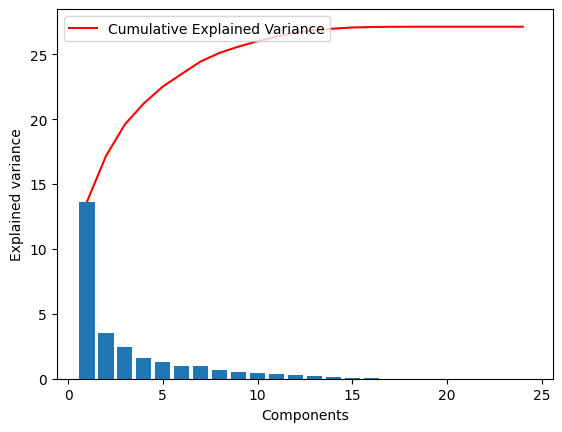

In [90]:
plt.bar(range(1, len(pca1.explained_variance_) + 1), pca1.explained_variance_)
plt.ylabel("Explained variance")
plt.xlabel('Components')
plt.plot(range(1, len(pca1.explained_variance_) + 1), np.cumsum(pca1.explained_variance_), c='red', label="Cumulative Explained Variance")
plt.legend(loc="upper left")
plt.show()

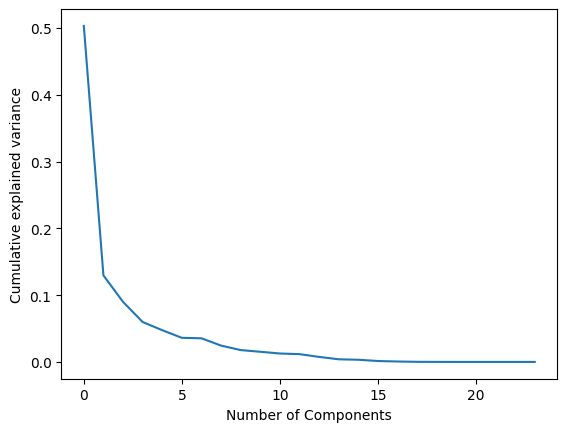

In [91]:
plt.plot(pca1.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [93]:
pca2 = PCA(0.95)
X_pca2 = pca2.fit_transform(X_train)
X_pca2.shape

(24, 10)

In [94]:
pca2.explained_variance_ratio_

array([0.50314359, 0.12956563, 0.08994538, 0.05976272, 0.04752044,
       0.03607675, 0.03536746, 0.02446027, 0.0177298 , 0.01520808])

C:\Users\ikiga\AppData\Local\Temp\ipykernel_30356\2921053653.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('coolwarm')


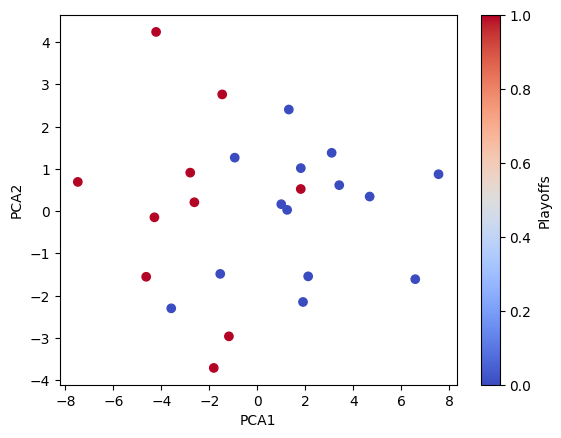

In [96]:
pca2c = PCA(n_components=2)
X_pca2c = pca2c.fit_transform(X_train)

colormap = plt.cm.get_cmap('coolwarm')
plt.figure()
scatter = plt.scatter(X_pca2c[:, 0], X_pca2c[:, 1], c=y_train, cmap=colormap)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(scatter, label="Playoffs")
plt.show()